<a href="https://colab.research.google.com/github/benhakunama/machinelearning/blob/main/senate_election_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as IDG
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [3]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn import metrics

In [6]:
df_train = pd.read_csv("df.train_encoded.csv")
df_test = pd.read_csv("df.test_encoded.csv")

In [ ]:
df_predict = pd.read_csv("network_fold_1")

In [ ]:


df_predict.columns

Index(['Unnamed: 0', 'y_hats'], dtype='object')

In [ ]:
df_predict['y_hats'] = df_predict['y_hats'].astype(float)

In [ ]:
#df_predict = pd.read_csv("network_fold_1")

df_predict['label'] = df_predict.apply(lambda row: 1 if row.y_hats > 0.5 else 0, axis =1 )
file_name = 'predict_network.csv'
df_predict.to_csv(file_name, sep=',')


In [ ]:
df_predict.head()

,Unnamed: 0,y_hats,label
0,0,0.999972,1
1,1,1.000000,1
2,2,1.000000,1
3,3,0.999416,1
4,4,0.999996,1


In [ ]:
df_train.columns

Index(['population_fulla', 'population_fulllv', 'population_fullrv',
       'population_fullv', 'sample_size', 'sponsor_candidate_partyDEM',
       'sponsor_candidate_partyREP', 'stateAlaska', 'stateArizona',
       'stateArkansas',
       ...
       'fte_grade_B..1', 'fte_grade_D', 'fte_grade_C.', 'fte_grade_A',
       'fte_grade_A..1', 'fte_grade_F', 'fte_grade_C..1', 'start_elect_ndays',
       'end_elect_ndays', 'prewinner'],
      dtype='object', length=120)

In [7]:
X = df_train.drop(['prewinner'], axis=1)
y = df_train['prewinner']


In [8]:
Xt2 = df_test.drop(['prewinner'], axis=1)
y2 = df_test['prewinner']

In [ ]:
len(X)

1140

In [9]:
from sklearn.model_selection import KFold, StratifiedKFold

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_columns = ["PredictedWinnerPct", "NumberofCandidates", "start_elect_ndays", "end_elect_ndays", "duration", "sample_size"]

transformer = ColumnTransformer(transformers=[('cat', StandardScaler(), num_columns)], remainder='passthrough')
X = transformer.fit_transform(X)
X2 = transformer.transform(Xt2)

In [11]:
from sklearn.model_selection import cross_val_score


In [12]:
from numpy import mean

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)
model = XGBClassifier(n_estimators=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# return scores
k_mean, k_min, k_max = mean(scores), scores.min(), scores.max()
print('traing with cross validation accuracy=%.3f (%.3f,%.3f)' % (k_mean, k_min, k_max))
model.fit(X, y)
prediction_start = time.perf_counter()
preds = model.predict(X2)
prediction_end = time.perf_counter()
acc_xgb = (preds == y2).sum().astype(float) / len(preds)*100
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


traing with cross validation accuracy=0.765 (0.737,0.798)
XGBoost's prediction accuracy is: 55.56


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
X2 = transformer.transform(Xt2)


In [ ]:
X_train.shape

(912, 119)

In [ ]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
# predict test in training data test
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
#print("Time consumed for training: %4.3f seconds" % (knn_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))
# predict test in test data test
prediction_start = time.perf_counter()
preds = knn.predict(X2)
prediction_end = time.perf_counter()
acc_knn = (preds == y2).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
#print("Time consumed for training: %4.3f seconds" % (knn_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 69.74
Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 47.22


In [ ]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
# predict test in training data test
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
#print("Time consumed for training: %4.3f" % (xgb_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
# predict test in test data test
prediction_start = time.perf_counter()
preds = xgb.predict(X2)
prediction_end = time.perf_counter()
acc_xgb = (preds == y2).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
#print("Time consumed for training: %4.3f" % (xgb_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))


XGBoost's prediction accuracy is: 78.07
XGBoost's prediction accuracy is: 59.44


In [ ]:
#lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
lr_test_pred = lr.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(lr_test_pred,y_test))

lr_test_pred = lr.predict(X2)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(lr_test_pred,y2))


The accuracy of the Logistic Regression is 0.7456140350877193
The accuracy of the Logistic Regression is 0.5666666666666667


In [ ]:
rfc = RandomForestClassifier(min_samples_split = 0.01)
rfc.fit(X_train, y_train)

rfc_test_pred = rfc.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(rfc_test_pred,y_test))

rfc_test_pred = rfc.predict(X2)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(rfc_test_pred,y2))

The accuracy of the Logistic Regression is 0.7763157894736842
The accuracy of the Logistic Regression is 0.5611111111111111


In [13]:
from tensorflow import keras

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
X_train.shape

(912, 119)

In [ ]:
y_train.shape

(883,)

In [15]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [16]:
def get_model_simple():
  model = Sequential()
  # Add input layer with 119 neurons
  model.add(Dense(119, input_dim=119, activation='relu'))

  # Add a hidden layer with 32 neurons
  model.add(Dense(521, activation='relu'))

  # Add a hidden layer with 32 neurons
  model.add(Dense(256, activation='relu'))

  # Add a hidden layer with 32 neurons
  model.add(Dense(64, activation='relu'))

  # Add a hidden layer with 32 neurons
  model.add(Dense(32, activation='relu'))

  # Add a hidden layer with 16 neurons
  model.add(Dense(16, activation='relu'))

  # Add a hidden layer with 16 neurons
  model.add(Dense(8, activation='relu'))

  # Add a hidden layer with 16 neurons
  #model.add(Dense(4, activation='relu'))

  # Add output layer with 1 neuron and sigmoid activation for binary classification
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model with binary cross-entropy loss function and Adam optimizer
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [17]:
model = get_model_simple()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 119)               14280     
                                                                 
 dense_1 (Dense)             (None, 521)               62520     
                                                                 
 dense_2 (Dense)             (None, 256)               133632    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 1

In [18]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
best_test_acc = 0
best_model = Sequential()
total_train_acc = []
total_test_acc = []
#best_X_train 
#best_y_train
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
  print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]    
  cnt += 1
  model = get_model_simple()
  # Train the model on the training data
  history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print('Test accuracy in training data:', test_acc)
  total_train_acc.append(test_acc)
  test_loss, test_acc2 = model.evaluate(X2, y2)
  print('Real Future Test accuracy:', test_acc2)
  total_test_acc.append(test_acc2)
  if best_test_acc < test_acc2:
    best_test_acc = test_acc2
    best_model = model    
    best_X_train = X_train
    best_y_train = y_train
    #network_test_pred = best_model.predict(X2)
    y_hats = best_model.predict(X2)
    file_name = "network_fold_" + str(cnt-1)
    y_hats_df = pd.DataFrame(data = y_hats, columns = ['y_hats'])    
    y_hats_df.to_csv(file_name, sep=',')
print('Test accuracy in training data:', total_train_acc)
print('Test accuracy in test data:', total_test_acc)

Fold:1, Train set: 912, Test set:228
8/8 [==============================] - 0s 4ms/step - loss: 2.6930 - accuracy: 0.7061
Test accuracy in training data: 0.7061403393745422
6/6 [==============================] - 0s 4ms/step - loss: 3.4564 - accuracy: 0.6000
Real Future Test accuracy: 0.6000000238418579
6/6 [==============================] - 0s 4ms/step
Fold:2, Train set: 912, Test set:228
8/8 [==============================] - 0s 4ms/step - loss: 2.7716 - accuracy: 0.7149
Test accuracy in training data: 0.7149122953414917
6/6 [==============================] - 0s 4ms/step - loss: 3.9556 - accuracy: 0.6111
Real Future Test accuracy: 0.6111111044883728
6/6 [==============================] - 0s 4ms/step
Fold:3, Train set: 912, Test set:228
8/8 [==============================] - 0s 3ms/step - loss: 2.4099 - accuracy: 0.7325
Test accuracy in training data: 0.7324561476707458
6/6 [==============================] - 0s 5ms/step - loss: 5.0158 - accuracy: 0.5889
Real Future Test accuracy: 0.588

In [19]:
import shap

In [20]:
import numpy as np

In [21]:
letters = best_X_train[np.random.choice(best_X_train.shape[0], 100, replace=False)]

In [39]:
explain = shap.DeepExplainer(best_model, letters)



Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [40]:
our_values_for_shap= explain.shap_values(X2[1:5])



`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [22]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#load libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import lifelines
import shap


In [24]:
import matplotlib.pyplot as plt

In [25]:
# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]

In [26]:
letters = best_X_train[np.random.choice(best_X_train.shape[0], 100, replace=False)]
e = shap.KernelExplainer(best_model, letters)
shap_values = e.shap_values(X2)


  0%|          | 0/180 [00:00<?, ?it/s]

In [23]:
features = Xt2.columns

In [27]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)


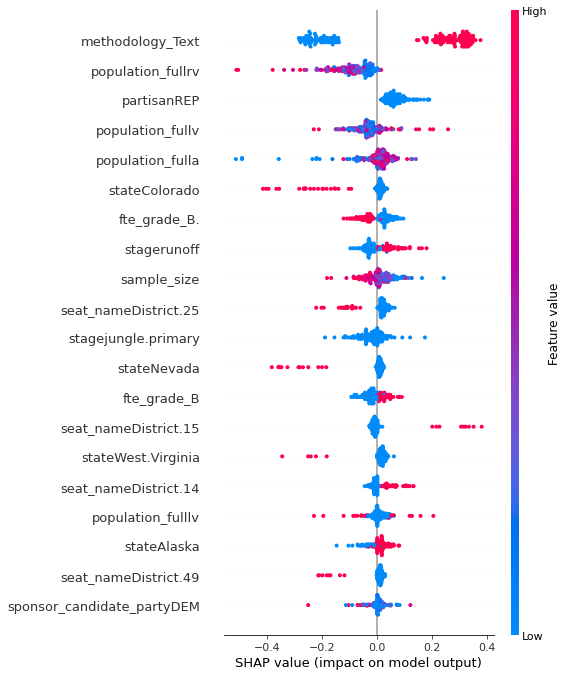

In [28]:
shap.summary_plot(shap_values[0], X2, feature_names=features)



TypeError: ignored

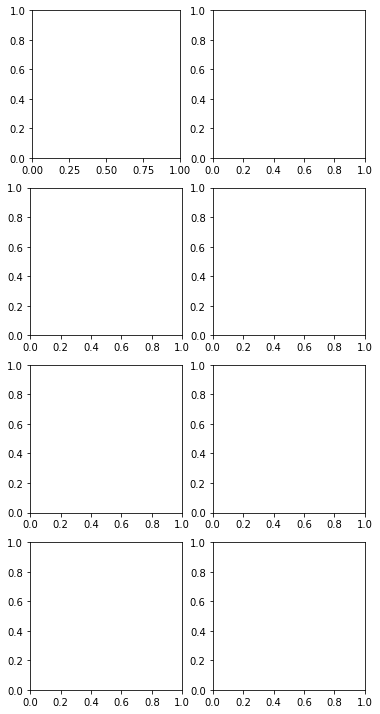

In [41]:
shap.image_plot(our_values_for_shap, -X2[1:5])




In [37]:
#masker = shap.maskers.Independent(data = X2)
# select a set of background examples to take an expectation over
background = X2[np.random.choice(X2.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(best_model, background)
shap_values = explainer.shap_values(X2)
shap.force_plot(explainer.expected_value[0], shap_values[0], X2, link="logit")

#shap_values = explainer(X2)
#shap.plots.waterfall(shap_values[0])
#shap.waterfall_plot(explainer.base_values[0], shap_values[0], X2[0]) 

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


TypeError: ignored

In [28]:
explainer = shap.Explainer(best_model)
shap_values = explainer(best_X_train)


TypeError: ignored

In [21]:
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 119)               14280     
                                                                 
 dense_41 (Dense)            (None, 521)               62520     
                                                                 
 dense_42 (Dense)            (None, 256)               133632    
                                                                 
 dense_43 (Dense)            (None, 64)                16448     
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 8)                

In [23]:
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [24]:
test_loss, test_acc2 = model.evaluate(X2, y2)
print('Real Future Test accuracy:', test_acc2)

6/6 [==============================] - 0s 4ms/step - loss: 3.7375 - accuracy: 0.5611
Real Future Test accuracy: 0.5611110925674438


In [22]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 7.9 MB/s eta 0:00:00


In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
best_test_acc = 0
best_model = Sequential()
total_train_acc = []
total_test_acc = []
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
  print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]    
  cnt += 1
  model = get_model_simple()
  # Train the model on the training data
  history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print('Test accuracy in training data:', test_acc)
  total_train_acc.append(test_acc)
  test_loss, test_acc2 = model.evaluate(X2, y2)
  print('Real Future Test accuracy:', test_acc2)
  total_test_acc.append(test_acc2)
  # if best_test_acc < test_acc:
  #   best_test_acc = test_acc
  #   best_model = model    
  #   network_test_pred = best_model.predict(X2)
  #   file_name = "network_fold_" + str(cnt-1)
  #   network_test_pred.to_csv(file_name, sep=',')
print('Test accuracy in training data:', total_train_acc)
print('Test accuracy in test data:', total_test_acc)


Fold:1, Train set: 912, Test set:228
8/8 [==============================] - 0s 3ms/step - loss: 2.4673 - accuracy: 0.7368
Test accuracy in training data: 0.7368420958518982
6/6 [==============================] - 0s 4ms/step - loss: 3.7264 - accuracy: 0.5944
Real Future Test accuracy: 0.5944444537162781
Fold:2, Train set: 912, Test set:228
8/8 [==============================] - 0s 3ms/step - loss: 2.3213 - accuracy: 0.7412
Test accuracy in training data: 0.7412280440330505
6/6 [==============================] - 0s 4ms/step - loss: 4.0919 - accuracy: 0.5500
Real Future Test accuracy: 0.550000011920929
Fold:3, Train set: 912, Test set:228
8/8 [==============================] - 0s 3ms/step - loss: 2.2153 - accuracy: 0.7281
Test accuracy in training data: 0.7280701994895935
6/6 [==============================] - 0s 3ms/step - loss: 4.4753 - accuracy: 0.5556
Real Future Test accuracy: 0.5555555820465088
Fold:4, Train set: 912, Test set:228
8/8 [==============================] - 0s 5ms/step -

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)
model = XGBClassifier(n_estimators=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# return scores
k_mean, k_min, k_max = mean(scores), scores.min(), scores.max()
print('traing with cross validation accuracy=%.3f (%.3f,%.3f)' % (k_mean, k_min, k_max))
model.fit(X, y)
prediction_start = time.perf_counter()
preds = model.predict(X2)
prediction_end = time.perf_counter()
acc_xgb = (preds == y2).sum().astype(float) / len(preds)*100
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

In [ ]:
model = Sequential()

# Add input layer with 119 neurons
model.add(Dense(119, input_dim=119, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(521, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(256, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(64, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(8, activation='relu'))

# Add a hidden layer with 16 neurons
#model.add(Dense(4, activation='relu'))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2, y2)
print('Real Future Test accuracy:', test_acc)



Epoch 1/50
23/23 [==============================] - 3s 33ms/step - loss: 0.6670 - accuracy: 0.6077 - val_loss: 0.6350 - val_accuracy: 0.6776
Epoch 2/50
23/23 [==============================] - 0s 18ms/step - loss: 0.5422 - accuracy: 0.7366 - val_loss: 0.6274 - val_accuracy: 0.6448
Epoch 3/50
23/23 [==============================] - 0s 18ms/step - loss: 0.4587 - accuracy: 0.7764 - val_loss: 0.5907 - val_accuracy: 0.6721
Epoch 4/50
23/23 [==============================] - 0s 21ms/step - loss: 0.3837 - accuracy: 0.8313 - val_loss: 0.6780 - val_accuracy: 0.6721
Epoch 5/50
23/23 [==============================] - 0s 20ms/step - loss: 0.3405 - accuracy: 0.8587 - val_loss: 0.7440 - val_accuracy: 0.7213
Epoch 6/50
23/23 [==============================] - 0s 15ms/step - loss: 0.2706 - accuracy: 0.8930 - val_loss: 0.8302 - val_accuracy: 0.6885
Epoch 7/50
23/23 [==============================] - 0s 15ms/step - loss: 0.1808 - accuracy: 0.9314 - val_loss: 1.0074 - val_accuracy: 0.6667
Epoch 8/50
23

In [ ]:
model = Sequential()

# Add input layer with 119 neurons
model.add(Dense(119, input_dim=119, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(521, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(256, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(64, activation='relu'))

# Add a hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add a hidden layer with 16 neurons
model.add(Dense(8, activation='relu'))

# Add a hidden layer with 16 neurons
#model.add(Dense(4, activation='relu'))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2, y2)
print('Real Future Test accuracy:', test_acc)


Epoch 1/50
23/23 [==============================] - 5s 26ms/step - loss: 0.6863 - accuracy: 0.5171 - val_loss: 0.6648 - val_accuracy: 0.7322
Epoch 2/50
23/23 [==============================] - 0s 12ms/step - loss: 0.6517 - accuracy: 0.6324 - val_loss: 0.6277 - val_accuracy: 0.7322
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.6013 - accuracy: 0.7147 - val_loss: 0.5340 - val_accuracy: 0.8087
Epoch 4/50
23/23 [==============================] - 0s 16ms/step - loss: 0.5725 - accuracy: 0.7517 - val_loss: 0.5301 - val_accuracy: 0.7923
Epoch 5/50
23/23 [==============================] - 0s 15ms/step - loss: 0.5395 - accuracy: 0.7764 - val_loss: 0.5053 - val_accuracy: 0.8251
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.5139 - accuracy: 0.7997 - val_loss: 0.5349 - val_accuracy: 0.7705
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.4826 - accuracy: 0.8217 - val_loss: 0.5395 - val_accuracy: 0.7923
Epoch 8/50
23

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [ ]:
import numpy as np

In [ ]:
Xtrain = X_train
Xtest = X_test

In [ ]:
X_train = Xtrain
X_test = Xtest

In [ ]:
num_samples, num_features = X_train.shape

In [ ]:
X_train.shape

(883, 79)

In [ ]:
import numpy as np

In [ ]:

# Reshape X_train to have 4 dimensions (batch_size, height, width, channels)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X2_cnn = X2.reshape(X2.shape[0], X2.shape[1], 1, 1)

# Parse numbers as floats
X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X2_cnn = X2_cnn.astype('float32')

model = Sequential()

# Add convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], 1, 1)))

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:], padding = 'same'))


# Add a second convolutional layer with 64 filters and a kernel size of 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2_cnn, y2)
print('Real Future Test accuracy:', test_acc)



Epoch 1/50
29/29 [==============================] - 2s 45ms/step - loss: 0.6457 - accuracy: 0.6250 - val_loss: 0.5503 - val_accuracy: 0.7368
Epoch 2/50
29/29 [==============================] - 1s 37ms/step - loss: 0.5573 - accuracy: 0.7215 - val_loss: 0.5145 - val_accuracy: 0.7632
Epoch 3/50
29/29 [==============================] - 1s 38ms/step - loss: 0.5038 - accuracy: 0.7511 - val_loss: 0.4982 - val_accuracy: 0.7500
Epoch 4/50
29/29 [==============================] - 1s 47ms/step - loss: 0.4848 - accuracy: 0.7599 - val_loss: 0.4919 - val_accuracy: 0.7544
Epoch 5/50
29/29 [==============================] - 2s 61ms/step - loss: 0.4674 - accuracy: 0.7796 - val_loss: 0.4872 - val_accuracy: 0.7368
Epoch 6/50
29/29 [==============================] - 2s 58ms/step - loss: 0.4419 - accuracy: 0.7763 - val_loss: 0.5013 - val_accuracy: 0.7456
Epoch 7/50
29/29 [==============================] - 1s 34ms/step - loss: 0.4294 - accuracy: 0.7950 - val_loss: 0.4834 - val_accuracy: 0.7368
Epoch 8/50
29

In [ ]:

# Reshape X_train to have 4 dimensions (batch_size, height, width, channels)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X2_cnn = X2.reshape(X2.shape[0], X2.shape[1], 1, 1)

# # Parse numbers as floats
# X_train_cnn = X_train_cnn.astype('float32')
# X_test_cnn = X_test_cnn.astype('float32')
# X2_cnn = X2_cnn.astype('float32')

model = Sequential()

# Add convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], 1, 1)))

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:], padding = 'same'))


# Add a second convolutional layer with 64 filters and a kernel size of 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2_cnn, y2)
print('Real Future Test accuracy:', test_acc)


Epoch 1/50
23/23 [==============================] - 2s 45ms/step - loss: 0.6534 - accuracy: 0.6379 - val_loss: 0.5730 - val_accuracy: 0.7377
Epoch 2/50
23/23 [==============================] - 1s 35ms/step - loss: 0.5232 - accuracy: 0.7407 - val_loss: 0.5589 - val_accuracy: 0.7377
Epoch 3/50
23/23 [==============================] - 1s 58ms/step - loss: 0.4980 - accuracy: 0.7613 - val_loss: 0.5390 - val_accuracy: 0.7268
Epoch 4/50
23/23 [==============================] - 1s 63ms/step - loss: 0.4707 - accuracy: 0.7709 - val_loss: 0.5325 - val_accuracy: 0.7322
Epoch 5/50
23/23 [==============================] - 2s 75ms/step - loss: 0.4557 - accuracy: 0.7791 - val_loss: 0.5401 - val_accuracy: 0.7213
Epoch 6/50
23/23 [==============================] - 2s 75ms/step - loss: 0.4457 - accuracy: 0.7764 - val_loss: 0.5692 - val_accuracy: 0.7158
Epoch 7/50
23/23 [==============================] - 2s 96ms/step - loss: 0.4352 - accuracy: 0.7805 - val_loss: 0.5496 - val_accuracy: 0.7268
Epoch 8/50
23

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X2_cnn = X2.reshape(X2.shape[0], X2.shape[1], 1, 1)

# Parse numbers as floats
X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X2_cnn = X2_cnn.astype('float32')

X_train_cnn /= 255
X_test_cnn /= 255
X2_cnn /= 255

batch_size = 32
#num_classes = 10
epochs = 50

#input image dimensions
#img_rows, img_cols = 28, 28


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:], kernel_initializer='he_normal', padding = 'same', data_format='channels_last'))
model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  kernel_initializer='he_normal',
#                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())

# Add an output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print('Test accuracy in training data:', test_acc)

test_loss, test_acc = model.evaluate(X2_cnn, y2)
print('Real Future Test accuracy:', test_acc)


Epoch 1/50
23/23 [==============================] - 6s 65ms/step - loss: 0.6999 - accuracy: 0.6516 - val_loss: 0.6834 - val_accuracy: 0.5738
Epoch 2/50
23/23 [==============================] - 1s 53ms/step - loss: 0.4729 - accuracy: 0.7833 - val_loss: 0.6844 - val_accuracy: 0.5738
Epoch 3/50
23/23 [==============================] - 1s 49ms/step - loss: 0.3794 - accuracy: 0.8409 - val_loss: 0.6878 - val_accuracy: 0.5738
Epoch 4/50
23/23 [==============================] - 1s 50ms/step - loss: 0.3393 - accuracy: 0.8505 - val_loss: 0.6891 - val_accuracy: 0.5738
Epoch 5/50
23/23 [==============================] - 1s 54ms/step - loss: 0.3001 - accuracy: 0.8834 - val_loss: 0.6869 - val_accuracy: 0.5738
Epoch 6/50
23/23 [==============================] - 1s 52ms/step - loss: 0.2646 - accuracy: 0.9040 - val_loss: 0.6828 - val_accuracy: 0.5738
Epoch 7/50
23/23 [==============================] - 1s 53ms/step - loss: 0.2443 - accuracy: 0.8985 - val_loss: 0.7039 - val_accuracy: 0.4262
Epoch 8/50
23